In [3]:
import numpy as np
import pandas as pd
import h5py
import sys
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import curve_fit
import imageio
from pathlib import Path

sys.path.insert(0, './radiometric')
from LUT_functions import pixel_registration, create_LUT_df
import scipy

In [42]:
path = '/Volumes/KESU/apr06/'
file_path = Path(path+'/boson/')
files = list(file_path.glob('*.h5'))
df_list = []
df_names = []
images = []

for file_name in files:
    fn = file_name.as_posix()
    hf = h5py.File(fn, 'r')
    image = hf.get('im1')
    df_names.append(fn[26:])
    images.append(image)
    

In [44]:
df_names

['0.h5', '135.h5', '180.h5', '45.h5', '90.h5']

In [48]:
I0   = np.array(images[0])
I135 = np.array(images[1])
I180 = np.array(images[2])
I45  = np.array(images[3])
I90  = np.array(images[4])

In [51]:
S0 = (I0+I45+I90+I135)/2
S1 = (I0-I90)
S2 = (I45-I135)

<ipython-input-87-482a3d784fa5>:17: UserWarning: Use the colorbar set_ticks() method instead.
  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);


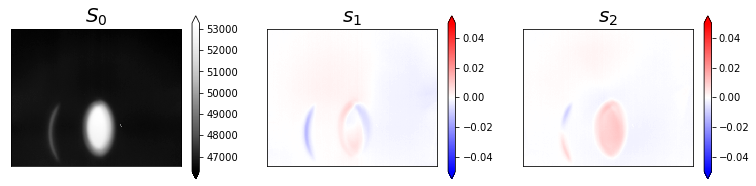

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos1 = ax1.imshow(S0, cmap='Greys_r', interpolation='none')
fig.colorbar(pos1, ax=ax1,extend='both')
ax1.set_title("$S_0$",fontsize = 20)

pos2 = ax2.imshow(S1/S0, cmap='bwr', interpolation='none',vmin=-.05, vmax=.05)
fig.colorbar(pos2, ax=ax2,extend='both')
ax2.set_title("$s_1$",fontsize = 20)

pos3 = ax3.imshow(S2/S0, cmap='bwr', interpolation='none',vmin=-.05, vmax=.05)
fig.colorbar(pos3, ax=ax3,extend='both')
ax3.set_title("$s_2$",fontsize = 20)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

plt.show()

<ipython-input-93-1e61545e548f>:18: UserWarning: Use the colorbar set_ticks() method instead.
  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);


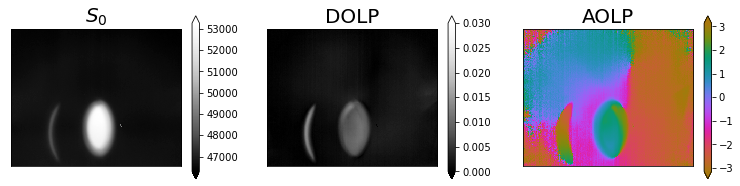

In [93]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 3), ncols=3)
import cmocean

# plot just the positive data and save the
# color "mappable" object returned by ax1.imshow
pos1 = ax1.imshow(S0, cmap='Greys_r', interpolation='none')
fig.colorbar(pos1, ax=ax1,extend='both')
ax1.set_title("$S_0$",fontsize = 20)

pos2 = ax2.imshow(np.sqrt(S1**2+S2**2)/S0, cmap='Greys_r', interpolation='none',vmin=0, vmax=.03)
fig.colorbar(pos2, ax=ax2,extend='both')
ax2.set_title("DOLP",fontsize = 20)

pos3 = ax3.imshow(np.arctan2(S2,S1), cmap=cmocean.cm.phase, interpolation='none',vmin=-3.14, vmax=3.14)
fig.colorbar(pos3, ax=ax3,extend='both')
ax3.set_title("AOLP",fontsize = 20)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

plt.show()